In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("/DIR/10719-partial-update")

import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib
import collections
import json
import torch
import torch.nn as nn
import math
import random
import h5py
import time
from system.flcore.trainmodel.models import *

In [2]:
model = FEMNIST_CNN()
summ = 0
for name, param in model.named_parameters():
    summ += torch.numel(param)
print('total', summ, 'parameters')

for name, param in model.named_parameters():
    print(name, f'{torch.numel(param)/summ * 100:.2f}%')

total 86910 parameters
conv1.0.weight 0.46%
conv1.0.bias 0.02%
conv2.0.weight 14.73%
conv2.0.bias 0.04%
fc1.0.weight 75.41%
fc1.0.bias 0.15%
fc.weight 9.13%
fc.bias 0.07%


In [3]:
model = EVEN_CNN()
summ = 0
for name, param in model.named_parameters():
    summ += torch.numel(param)
print('total', summ, 'parameters')

for name, param in model.named_parameters():
    print(name, f'{torch.numel(param)/summ * 100:.2f}%')

total 199806 parameters
conv1.0.weight 0.20%
conv1.0.bias 0.01%
conv2.0.weight 6.41%
conv2.0.bias 0.02%
conv3.0.weight 25.62%
conv3.0.bias 0.03%
conv4.0.weight 18.45%
conv4.0.bias 0.03%
conv5.0.weight 36.90%
conv5.0.bias 0.06%
fc1.0.weight 8.20%
fc1.0.bias 0.06%
fc.weight 3.97%
fc.bias 0.03%


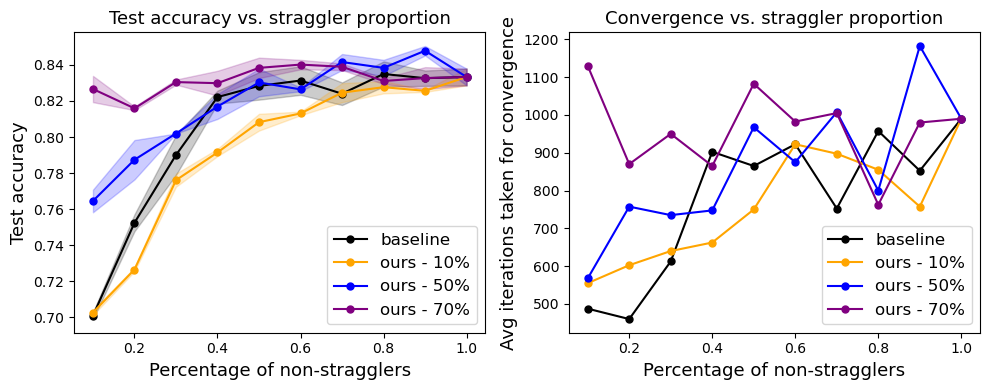

In [4]:
baseline_0curve, baseline_0convergence = [], []
for NC in np.arange(1, 11)*10:
    filename = f'results/EVEN_CNN/baseline_0/NC={NC}/femnist_FedAvg_first_0.h5'
    f = h5py.File(filename, "r")
    baseline_0curve.append(f['rs_test_acc'][()][-1])
    baseline_0convergence.append(len(f['rs_test_acc'][()])*5)

baseline_1curve, baseline_1convergence = [], []
for NC in np.arange(1, 11)*10:
    filename = f'results/EVEN_CNN/baseline_1/NC={NC}/femnist_FedAvg_first_0.h5'
    f = h5py.File(filename, "r")
    baseline_1curve.append(f['rs_test_acc'][()][-1])
    baseline_1convergence.append(len(f['rs_test_acc'][()])*5)

our_3layer_0_curve, our_3layer_0_convergence = [], []
for CR in np.arange(1, 10)/10:
    filename = f'results/EVEN_CNN/ours_half_0/CR={CR}/femnist_ServerPU_first_0.h5'
    f = h5py.File(filename, "r")
    our_3layer_0_curve.append(f['rs_test_acc'][()][-1])
    our_3layer_0_convergence.append(len(f['rs_test_acc'][()])*5)
our_3layer_0_curve.append(baseline_0curve[-1])
our_3layer_0_convergence.append(baseline_0convergence[-1])
    
our_3layer_1_curve, our_3layer_1_convergence = [], []
for CR in np.arange(1, 10)/10:
    filename = f'results/EVEN_CNN/ours_half_1/CR={CR}/femnist_ServerPU_first_0.h5'
    f = h5py.File(filename, "r")
    our_3layer_1_curve.append(f['rs_test_acc'][()][-1])
    our_3layer_1_convergence.append(len(f['rs_test_acc'][()])*5)
our_3layer_1_curve.append(baseline_1curve[-1])
our_3layer_1_convergence.append(baseline_1convergence[-1])
    
our_2layer_0_curve, our_2layer_0_convergence = [], []
for CR in np.arange(1, 10)/10:
    filename = f'results/EVEN_CNN/ours_0.1_0/CR2={CR}/femnist_ServerPU_first_0.h5'
    f = h5py.File(filename, "r")
    our_2layer_0_curve.append(f['rs_test_acc'][()][-1])
    our_2layer_0_convergence.append(len(f['rs_test_acc'][()])*5)
our_2layer_0_curve.append(baseline_0curve[-1])
our_2layer_0_convergence.append(baseline_0convergence[-1])
    
our_2layer_1_curve, our_2layer_1_convergence = [], []
for CR in np.arange(1, 10)/10:
    filename = f'results/EVEN_CNN/ours_0.1_1/CR2={CR}/femnist_ServerPU_first_0.h5'
    f = h5py.File(filename, "r")
    our_2layer_1_curve.append(f['rs_test_acc'][()][-1])
    our_2layer_1_convergence.append(len(f['rs_test_acc'][()])*5)
our_2layer_1_curve.append(baseline_1curve[-1])
our_2layer_1_convergence.append(baseline_1convergence[-1])
    
our_4layer_0_curve, our_4layer_0_convergence = [], []
for CR in np.arange(1, 10)/10:
    filename = f'results/EVEN_CNN/ours_0.7_0/CR3={CR}/femnist_ServerPU_first_0.h5'
    f = h5py.File(filename, "r")
    our_4layer_0_curve.append(f['rs_test_acc'][()][-1])
    our_4layer_0_convergence.append(len(f['rs_test_acc'][()])*5)
our_4layer_0_curve.append(baseline_0curve[-1])
our_4layer_0_convergence.append(baseline_0convergence[-1])

our_4layer_1_curve, our_4layer_1_convergence = [], []
for CR in np.arange(1, 10)/10:
    filename = f'results/EVEN_CNN/ours_0.7_1/CR3={CR}/femnist_ServerPU_first_0.h5'
    f = h5py.File(filename, "r")
    our_4layer_1_curve.append(f['rs_test_acc'][()][-1])
    our_4layer_1_convergence.append(len(f['rs_test_acc'][()])*5)
our_4layer_1_curve.append(baseline_1curve[-1])
our_4layer_1_convergence.append(baseline_1convergence[-1])
    

plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
x = np.arange(1, 11)/10
plt.plot(x,np.mean([baseline_0curve,baseline_1curve], axis=0),'k.-', markersize=10,label='baseline')
plt.fill_between(x, np.minimum(baseline_0curve, baseline_1curve), np.maximum(baseline_0curve, baseline_1curve), color='k', alpha=.2)

plt.plot(x,np.mean([our_2layer_0_curve, our_2layer_1_curve], axis=0), '.-',color='orange',markersize=10,label='ours - 10%')
plt.fill_between(x, np.minimum(our_2layer_0_curve, our_2layer_1_curve), np.maximum(our_2layer_0_curve, our_2layer_1_curve), color='orange', alpha=.2)

plt.plot(x,np.mean([our_3layer_0_curve, our_3layer_1_curve], axis=0), '.-',color='blue',markersize=10,label='ours - 50%')
plt.fill_between(x, np.minimum(our_3layer_0_curve, our_3layer_1_curve), np.maximum(our_3layer_0_curve, our_3layer_1_curve), color='blue', alpha=.2)

plt.plot(x,np.mean([our_4layer_0_curve, our_4layer_1_curve], axis=0), '.-',color='purple',markersize=10,label='ours - 70%')
plt.fill_between(x, np.minimum(our_4layer_0_curve, our_4layer_1_curve), np.maximum(our_4layer_0_curve, our_4layer_1_curve), color='purple', alpha=.2)
plt.xlabel('Percentage of non-stragglers', fontsize=13)
plt.ylabel('Test accuracy', fontsize=13)
plt.title('Test accuracy vs. straggler proportion', fontsize=13)
plt.legend(fontsize=12)

plt.subplot(122)
plt.plot(x,np.mean([baseline_0convergence, baseline_1convergence], axis=0),'k.-', markersize=10,label='baseline')
plt.plot(x,np.mean([our_2layer_0_convergence, our_2layer_1_convergence], axis=0),'.-',color='orange',markersize=10,label='ours - 10%')
plt.plot(x,np.mean([our_3layer_0_convergence,our_3layer_1_convergence], axis=0), '.-',color='blue',markersize=10,label='ours - 50%')
plt.plot(x,np.mean([our_4layer_0_convergence, our_4layer_1_convergence], axis=0),'.-',color='purple',markersize=10,label='ours - 70%')
plt.xlabel('Percentage of non-stragglers', fontsize=13)
plt.ylabel('Avg iterations taken for convergence', fontsize=13)
plt.title('Convergence vs. straggler proportion', fontsize=13)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig('analysis/7-layer_femnist.pdf')